# **A. Dataset Preparation**

### **Data Summary**
**Import Dataset**

The dataset used in this project was obtained from Kaggle (Pima Indians Diabetes Database). The file used is diabetes.csv, which contains clinical data for 768 female Pima Indian patients aged 21 years or older.
The goal of this analysis is to predict the diabetes status of each patient using the available diagnostic variables.


**Dataset Size and Structure**

* Number of rows (observations): 768

* Number of columns: 9 (8 predictor features + 1 target variable)

* Target variable: Outcome (binary: 1 = diabetic, 0 = non-diabetic)

* Data types: Most columns are numeric (integer / float), making the dataset suitable for both statistical analysis and machine learning modeling.

In [113]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-dataset


### **Load Dataset**
**List of Variables (Columns)**
1. Pregnancies : Number of pregnancies (integer)

2. Glucose : Plasma glucose concentration (mg/dL)

3. BloodPressure : Diastolic blood pressure (mmHg)

4. SkinThickness : Skin fold thickness (mm)

5. Insulin : Serum insulin level (μU/mL)

6. BMI : Body Mass Index (kg/m²)

7. DiabetesPedigreeFunction : Diabetes pedigree function (a score indicating family history influence)

8. Age : Patient age (years)

9. Outcome : Target diagnosis (0 = non-diabetic, 1 = diabetic)

In [114]:
import pandas as pd
df=pd.read_csv(path + "/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Brief Plan of Initial Steps**

1. Load the dataset and display its basic structure using .info() and .head().

2. Identify columns containing invalid zero values and count their frequencies.

3. Replace zero values with NaN in the relevant columns, then perform median imputation.

4. Present a summary of descriptive statistics and visualize the distributions before and after imputation.

### **View the First 5 Rows to Understand the Data Pattern**
The first five rows provide an initial overview where each row represents a single patient.
It can be observed that several columns (Insulin, SkinThickness, and Glucose) contain zero values, which are medically impossible.
This serves as an early indication of hidden missing values (implicit missing data).
For instance, the first patient has an insulin level of 0, and the third patient has a skin thickness value of 0, both of which are biologically unrealistic and must be addressed during the data cleaning stage.

In addition, we can observe that the variable Outcome is binary, where 1 represents diabetic and 0 represents non-diabetic.

In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Basic Descriptive Statistics**
* The minimum (min) value in several columns is 0, which is unrealistic for medical measurements such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

* The average glucose level (Glucose) is relatively high (120.89 mg/dL), indicating that this dataset focuses on a population at risk of diabetes.

* The Insulin column has a very large standard deviation (115.24) and an extreme maximum value (846), suggesting the presence of strong outliers.

* This reinforces the need for data cleaning and Interquartile Range (IQR) analysis to properly handle extreme distributions such as those found in the Insulin variable.

In [116]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Check the Number of Zero Values (Possible Hidden Missing Values)**
* The Insulin column contains 374 zero values, accounting for approximately 48% of the total data — this is highly significant and confirms that this variable has many hidden missing values.

* The SkinThickness column is also problematic, with 227 zeros (almost 30% of the data).

* Glucose, BloodPressure, and BMI have fewer zeros but still require correction.

* A zero value in Pregnancies is valid (it simply means the patient has never been pregnant), so it is not considered missing.

* The Outcome column has 500 zeros, but since this is the class label (0 = non-diabetic), it is not a missing value.

In [117]:
zero_counts = (df == 0).sum()
print("\nNumber of zero values in each column:\n", zero_counts)


Number of zero values in each column:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


### **Replace Zero Values in Medically Invalid Columns with NaN (Missing Values)**
This step replaces unrealistic zero values in the five main medical columns with NaN.
The goal is to ensure that the Pandas library and statistical functions recognize these entries as official missing values.
After this step, we can recalculate the number of NaN values to prepare for the imputation process.

In [118]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [119]:
import numpy as np
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

### **Recheck the Number of Missing Values After Replacement**
At this stage, all missing values have been correctly identified.
The variable Insulin has the highest proportion of missing data (48.7%), followed by SkinThickness (29.5%).
These missing values need to be imputed to prevent the model from becoming biased due to the large proportion of missing information.

In [120]:
print("\nNumber of Missing Values After Conversion:\n", df.isnull().sum())


Number of Missing Values After Conversion:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### **Impute Missing Values Using the Median**
The chosen strategy is median imputation, because:

* The median is more robust to outliers compared to the mean.

* Medical data such as Insulin and BMI often have skewed (non-symmetric) distributions, making the median a more representative central measure.

After imputation, all NaN values have been replaced, resulting in a complete dataset ready for further analysis.

In [121]:
for col in cols_with_zeros:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

/tmp/ipython-input-3101947927.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


### **Ensure No Missing Values After Imputation**
All missing values have been successfully filled, the dataset is now clean (0 missing values).

The data cleaning process is complete, and the dataset is ready for deeper exploration (EDA and correlation analysis).

In [122]:
print("\nNumber of missing values after imputation:\n", df.isnull().sum())


Number of missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **B. Distribution, Normalization, and Distribution Visualization**

### **Check Target Distribution (Outcome)**
The target variable is slightly imbalanced, approximately one in three patients is diagnosed with diabetes.

This imbalance is moderate and can be handled without resampling during the modeling stage.

However, it is important to pay attention to evaluation metrics such as ROC-AUC and Recall, to ensure the model does not become biased toward the majority (non-diabetic) class.

In [123]:
print("\nTarget Outcome Distribution:")
print(df['Outcome'].value_counts(normalize=True))


Target Outcome Distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


### **Initial Visualization of Numerical Distributions**
The histograms show that most variables are right-skewed, particularly Insulin, DiabetesPedigreeFunction, and Pregnancies.

The Glucose variable appears close to a normal distribution but peaks within the 100–130 mg/dL range, which is relatively high for a general population.

This suggests a potential non-linear relationship between some predictor variables and diabetes risk.

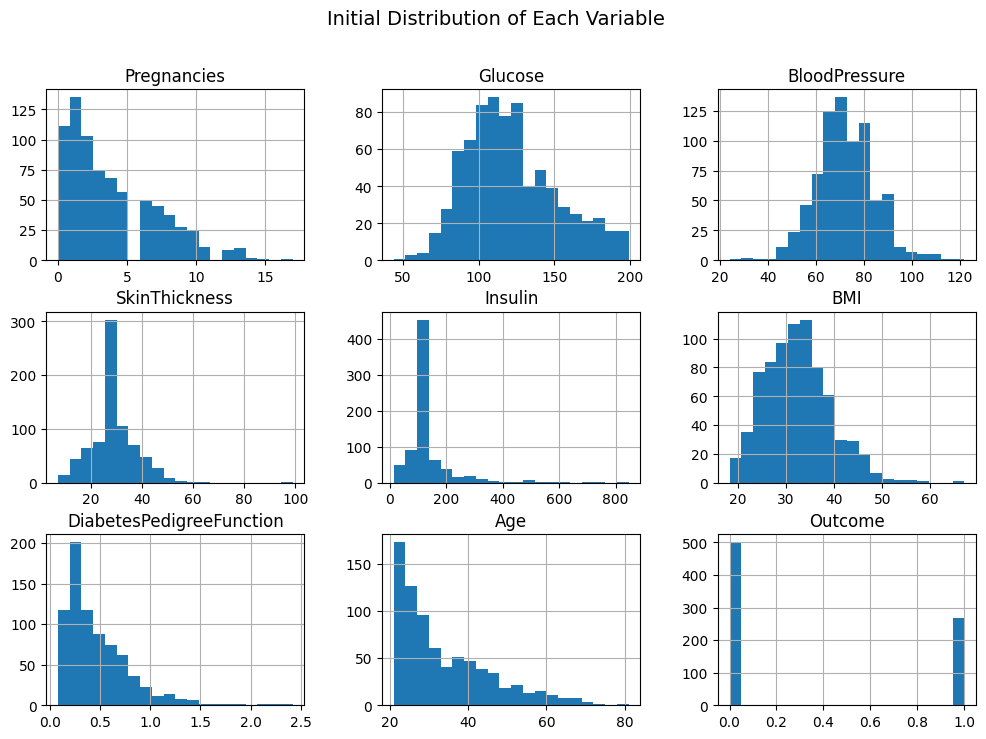

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Initial Distribution of Each Variable", fontsize=14)
plt.show()

### **Boxplot for Outlier Detection**
From the boxplot visualization, the Insulin column displays a highly uneven distribution with many extreme values above the third quartile.

This indicates the presence of significant outliers in insulin levels, even after median imputation.

Medically, this is reasonable since insulin levels vary widely among patients, but such variability must be handled carefully in modeling (for example, by using a RobustScaler or logarithmic transformation).

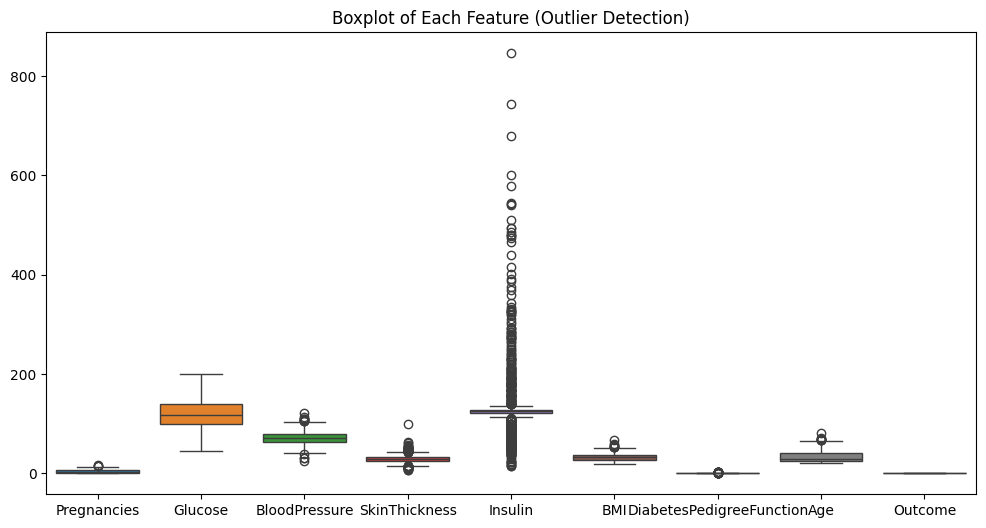

In [125]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Each Feature (Outlier Detection)")
plt.show()

### **Save a Copy Before Normalization**
This step saves a copy of the dataset before applying normalization, allowing us to compare the distributions between the raw and normalized data.

By storing df_original, we can easily visualize differences (via boxplots or descriptive statistics) without losing the original data reference.

In [126]:
df_original = df.copy()

### **List of Columns to be Normalized**
Only the Insulin column is normalized using the IQR Normalization method, because the previous Exploratory Data Analysis (EDA) showed that:

* This column has the most uneven distribution and the highest number of extreme outliers.

* The maximum value reaches 846, far above most observations (typically below 200).

* The standard deviation (115.24) is considerably larger compared to other features.

By normalizing only Insulin, we focus on reducing the effect of extreme values in the most problematic column without altering the scale of other features.

In [127]:
numeric_cols = ['Insulin']

### **IQR-Based Normalization Function**
The Interquartile Range (IQR) normalization standardizes data relative to its median and middle range (IQR = Q3 – Q1).

Advantages:

* More robust to outliers, since the median and IQR are not affected by extreme values.

* The transformed value (x') represents how far a point lies from the median, measured in IQR units.

Interpretation:

* Positive values → above the median.

* Negative values → below the median.

* Values near 0 → close to the median of the distribution.

In [128]:
def iqr_normalization(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series - series.median()) / IQR

### **Apply IQR Normalization**
This step duplicates the dataset and applies the normalization function to the Insulin column.

The new dataset (df_iqr) now contains normalized Insulin values, while other columns remain in their original scales.
This allows us to compare the results of the transformation without affecting other features.

In [129]:
df_iqr = df.copy()
df_iqr[numeric_cols] = df_iqr[numeric_cols].apply(iqr_normalization)

### **Boxplot Comparison Before and After Normalization**
The boxplot visualization shows the distribution of Insulin before and after normalization:

* Before normalization:
The Insulin distribution is strongly right-skewed, with many outliers far above the third quartile.
These extreme values create long whiskers and distort the proportional appearance of the boxplot.

* After normalization:
The Insulin distribution becomes much more balanced.
The median shifts to 0 (since values are centered around the median), and most data points fall within –1 to +1, corresponding to one IQR below or above the median.
Extreme outliers still exist, but their scale is reduced significantly, preventing them from dominating the visualization.

Thus, IQR normalization effectively reduces the influence of outliers without deleting any data points.

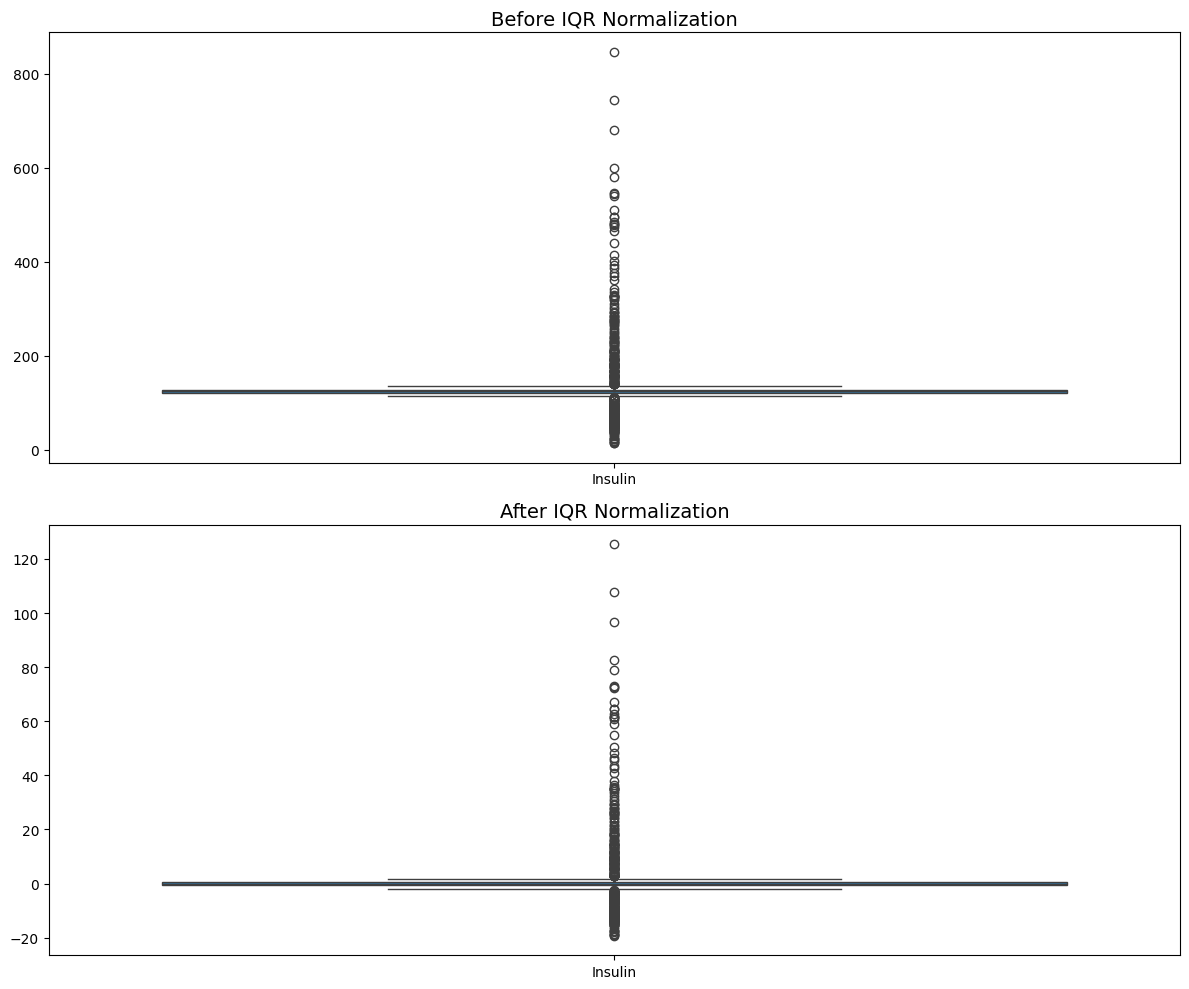

In [130]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
sns.boxplot(data=df_original[numeric_cols], ax=axes[0])
axes[0].set_title("Before IQR Normalization", fontsize=14)

sns.boxplot(data=df_iqr[numeric_cols], ax=axes[1])
axes[1].set_title("After IQR Normalization", fontsize=14)

plt.tight_layout()
plt.show()

### **Descriptive Statistics After Normalization**
* Median equals 0:
This aligns with the IQR normalization formula, which uses the median as the central reference.
Values above the median become positive, and those below become negative.

* Minimum value: -19.30:
This is normal and expected after normalization.
Negative values indicate data points below the median, the more negative, the farther they are below the median, measured in IQR units.
For example, –19.3 means there is a patient whose insulin level is 19 IQRs below the median.

* Maximum value: 125.39:
Still relatively large, showing a patient with insulin far above the median.
However, after normalization, this value is no longer on an absolute scale (from 846 → 125), significantly reducing its impact on statistical analysis and modeling.

* Mean ≈ 2.72, Standard Deviation ≈ 15.02:
Because the distribution still has slight asymmetry, the mean is slightly shifted from 0.
However, overall, the distribution is now more symmetric and stable compared to before normalization.

In [131]:
df_iqr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,2.725543,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,15.023141,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,-19.304348,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,-0.608696,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,0.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,0.391304,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,125.391304,67.100000,2.420000,81.000000,1.000000


# **C. Hypothesis Testing**

### **1. H1: The Mean Glucose Level of Diabetic Patients Is Significantly Higher Than That of Non-Diabetic Patients**

Based on the Pima Indians Diabetes medical dataset, we propose the main hypothesis (H1):

H1: The mean glucose level of diabetic patients (Outcome = 1) is significantly higher than that of non-diabetic patients (Outcome = 0).

In other words, we assume that diabetic patients have considerably higher blood glucose levels.

Statistical Formulation:

* H₀ (null hypothesis): μ₁ = μ₀
(There is no significant difference in glucose levels between the two groups)

* H₁ (alternative hypothesis): μ₁ > μ₀
(The mean glucose level in diabetic patients is higher than in non-diabetic patients)

The test used is an Independent Samples T-Test (one-tailed), as we are testing for a directional difference, specifically, whether the diabetic group has a higher mean value.

In [132]:
import scipy.stats as stats

group_no = df[df['Outcome'] == 0]['Glucose']
group_yes = df[df['Outcome'] == 1]['Glucose']

desc_stats = pd.DataFrame({
    'Outcome': ['Non-Diabetic (0)', 'Diabetic (1)'],
    'Mean Glucose': [group_no.mean(), group_yes.mean()],
    'Median Glucose': [group_no.median(), group_yes.median()],
    'Std Dev': [group_no.std(), group_yes.std()],
    'Count': [group_no.count(), group_yes.count()]
})
print("Descriptive Statistics by Outcome:\n")
print(desc_stats)

Descriptive Statistics by Outcome:

            Outcome  Mean Glucose  Median Glucose    Std Dev  Count
0  Non-Diabetic (0)    110.682000           107.5  24.707201    500
1      Diabetic (1)    142.130597           140.0  29.568839    268


The results show that the mean glucose level among diabetic patients is 142.13 mg/dL, while the non-diabetic group has a mean of 110.68 mg/dL.

The difference of approximately 31.45 mg/dL is a strong initial indication of statistical significance.

The diabetic group also shows a slightly higher standard deviation (29.57), suggesting greater variability in glucose levels among diabetic patients.
The sample sizes for both groups are sufficiently large (n₁ = 268, n₂ = 500), ensuring high reliability of the statistical test.

### **Glucose Distribution Visualization**
The visualization shows two distribution curves:

* The blue curve (Outcome = 0) represents non-diabetic patients.

* The orange curve (Outcome = 1) represents diabetic patients.

The orange curve shifts significantly to the right, indicating that most diabetic patients have higher glucose levels.
The data distribution is right-skewed, particularly for the diabetic group, meaning that a few patients have extremely high glucose readings.

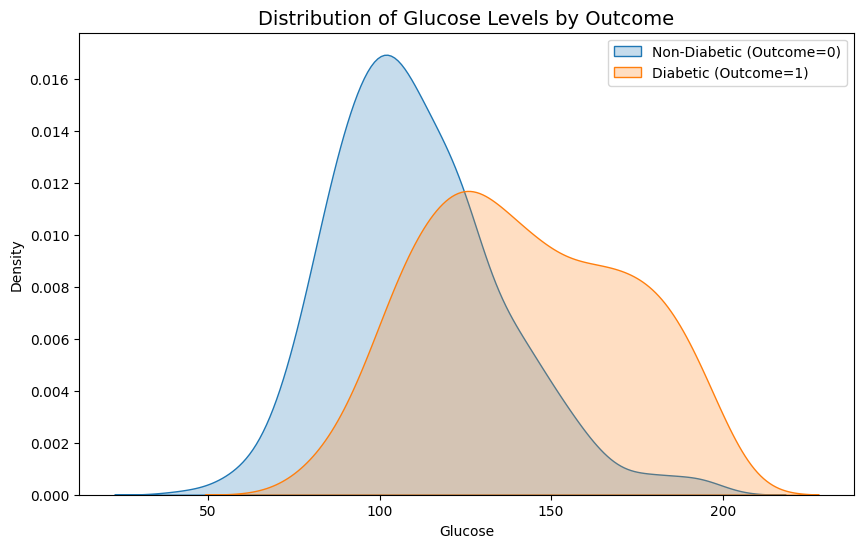

In [133]:
plt.figure(figsize=(10,6))
sns.kdeplot(group_no, label="Non-Diabetic (Outcome=0)", fill=True)
sns.kdeplot(group_yes, label="Diabetic (Outcome=1)", fill=True)
plt.title("Distribution of Glucose Levels by Outcome", fontsize=14)
plt.xlabel("Glucose")
plt.legend()
plt.show()

### **Normality Test (Shapiro-Wilk)**
The p-values for both groups are less than 0.05, indicating that the data are not normally distributed.
However, since the sample sizes are large (n > 30), we can proceed with the Welch’s T-Test, which is robust to violations of normality assumptions.

In [134]:
shapiro_no = stats.shapiro(group_no)
shapiro_yes = stats.shapiro(group_yes)
print(f"\nShapiro-Wilk Test (Outcome=0): p={shapiro_no.pvalue:.5f}")
print(f"Shapiro-Wilk Test (Outcome=1): p={shapiro_yes.pvalue:.5f}")


Shapiro-Wilk Test (Outcome=0): p=0.00000
Shapiro-Wilk Test (Outcome=1): p=0.00008


### **Equality of Variances Test (Levene’s Test)**
A p-value < 0.05 indicates that the variances between the two groups are not equal (heterogeneous variances).

Therefore, we use Welch’s T-Test, a variation of the t-test that does not assume equal variances.
This ensures the validity of results even when the spread of data differs between groups.

In [135]:
levene_test = stats.levene(group_no, group_yes)
print(f"\nLevene’s Test for Equality of Variances: p={levene_test.pvalue:.5f}")


Levene’s Test for Equality of Variances: p=0.00000


### **Independent Two-Sample T-Test (One-Tailed)**
The T-statistic = 14.85 is very high, with a p-value = 0.000000 (p < 0.001), indicating a highly significant result.

At a significance level of α = 0.05, we reject H₀ and accept H₁.

Conclusion, there is a statistically significant difference between the glucose levels of diabetic and non-diabetic patients, with the diabetic group showing much higher glucose levels.
This finding aligns with medical knowledge that high blood glucose is a key indicator of diabetes.

In [136]:
t_stat, p_val = stats.ttest_ind(group_yes, group_no, equal_var=False, alternative='greater')
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value (one-tailed): {p_val:.6f}")


T-statistic: 14.8527
P-value (one-tailed): 0.000000


### **Effect Size (Cohen’s d)**
Cohen’s d = 1.154, which is considered a large effect size according to Cohen (1988):

* d = 0.2 → small effect

* d = 0.5 → medium effect

* d ≥ 0.8 → large effect

This means the difference in mean glucose levels between diabetic and non-diabetic patients is not only statistically significant but also clinically meaningful.

Such a strong effect supports the interpretation that glucose level is a primary predictor in diabetes diagnosis.

In [137]:
mean_diff = group_yes.mean() - group_no.mean()
pooled_std = np.sqrt(((group_yes.std() ** 2) + (group_no.std() ** 2)) / 2)
cohens_d = mean_diff / pooled_std
print(f"Cohen's d (Effect Size): {cohens_d:.3f}")

Cohen's d (Effect Size): 1.154


### **Boxplot Comparison of Glucose by Outcome**
The boxplot shows that the median glucose level of diabetic patients is substantially higher than that of the non-diabetic group.

The diabetic group’s box range is also larger, indicating greater variation in glucose levels and more upper outliers, typical in diabetic populations.

The clear separation between medians confirms the t-test results that glucose distributions differ significantly.

/tmp/ipython-input-1849314231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')


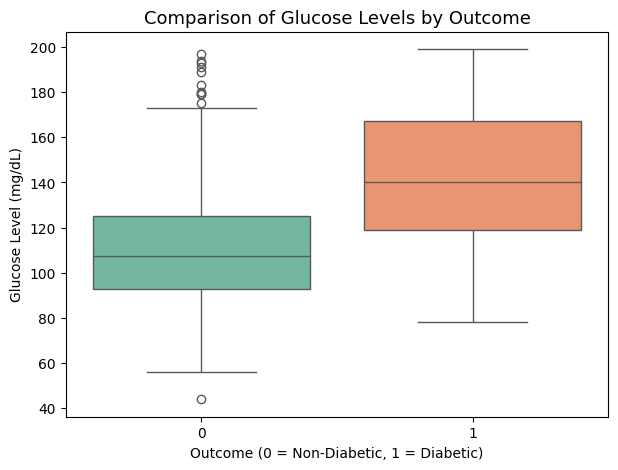

In [138]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title("Comparison of Glucose Levels by Outcome", fontsize=13)
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

The results confirm that blood glucose is the most influential variable in diagnosing diabetes.

On average, diabetic patients have glucose levels about 31 mg/dL higher than non-diabetic patients, showing both statistical and clinical significance.

### **2. H2: Patients with Higher BMI Are More Likely to Have Diabetes**
Hypothesis Formulation:

* H₀ (null hypothesis): μ₁ = μ₀
The mean BMI of diabetic and non-diabetic patients does not differ significantly.

* H₁ (alternative hypothesis): μ₁ > μ₀
The mean BMI of diabetic patients is higher than that of non-diabetic patients.

We use an Independent Samples T-Test (one-tailed) to test whether diabetic patients have significantly higher BMI.

In [139]:
bmi_no = df[df['Outcome'] == 0]['BMI']
bmi_yes = df[df['Outcome'] == 1]['BMI']

desc_bmi = pd.DataFrame({
    'Outcome': ['Non-Diabetic (0)', 'Diabetic (1)'],
    'Mean BMI': [bmi_no.mean(), bmi_yes.mean()],
    'Median BMI': [bmi_no.median(), bmi_yes.median()],
    'Std Dev': [bmi_no.std(), bmi_yes.std()],
    'Count': [bmi_no.count(), bmi_yes.count()]
})
print(desc_bmi)

            Outcome   Mean BMI  Median BMI   Std Dev  Count
0  Non-Diabetic (0)  30.885600       30.40  6.504128    500
1      Diabetic (1)  35.383582       34.25  6.595603    268


The results show that the mean BMI of diabetic patients is 35.38, while non-diabetic patients have a mean BMI of 30.89.

The difference of about 4.5 BMI points is clinically meaningful.

The standard deviation for both groups is similar (~6.5), suggesting comparable variation between patients.

### **Levene’s Test (Homogeneity of Variance), T-Test (One-Tailed), and Cohen’s d**
1. Levene’s test: p = 0.24272 > 0.05 → no significant variance difference between groups, indicating homogeneity.

2. T-test: T = 9.05 with p < 0.001 → result is highly significant. We reject H₀ and accept H₁.
Thus, the average BMI of diabetic patients is indeed higher than that of non-diabetic patients.

3. Cohen’s d = 0.687, classified as medium to large effect size.

Interpretation:
Higher BMI is significantly correlated with an increased risk of diabetes.
Physiologically, this makes sense, as overweight or obesity can cause insulin resistance, one of the main mechanisms leading to type 2 diabetes.

In [140]:
# Levene’s Test
levene_bmi = stats.levene(bmi_no, bmi_yes)

# T-Test (One-Tailed)
t_bmi, p_bmi = stats.ttest_ind(bmi_yes, bmi_no, equal_var=False, alternative='greater')

# Cohen’s d
mean_diff_bmi = bmi_yes.mean() - bmi_no.mean()
pooled_std_bmi = np.sqrt(((bmi_yes.std() ** 2) + (bmi_no.std() ** 2)) / 2)
cohens_d_bmi = mean_diff_bmi / pooled_std_bmi

print(f"\nLevene’s p-value: {levene_bmi.pvalue:.5f}")
print(f"T-statistic: {t_bmi:.4f}, P-value: {p_bmi:.6f}, Cohen’s d: {cohens_d_bmi:.3f}")


Levene’s p-value: 0.24272
T-statistic: 9.0517, P-value: 0.000000, Cohen’s d: 0.687


There is a statistically significant difference in BMI between diabetic and non-diabetic patients.

Patients with higher BMI are more likely to develop diabetes.

### **3. H3: Age Has a Significant Effect on the Likelihood of Diabetes**

Hypothesis Formulation:

* H₀: μ₁ = μ₀
There is no significant difference in mean age between diabetic and non-diabetic patients.

* H₁: μ₁ > μ₀
The mean age of diabetic patients is higher than that of non-diabetic patients.

We use an Independent Samples T-Test (one-tailed) to determine whether age is associated with diabetes risk.

In [141]:
age_no = df[df['Outcome'] == 0]['Age']
age_yes = df[df['Outcome'] == 1]['Age']

desc_age = pd.DataFrame({
    'Outcome': ['Non-Diabetic (0)', 'Diabetic (1)'],
    'Mean Age': [age_no.mean(), age_yes.mean()],
    'Median Age': [age_no.median(), age_yes.median()],
    'Std Dev': [age_no.std(), age_yes.std()],
    'Count': [age_no.count(), age_yes.count()]
})
print(desc_age)

            Outcome   Mean Age  Median Age    Std Dev  Count
0  Non-Diabetic (0)  31.190000        27.0  11.667655    500
1      Diabetic (1)  37.067164        36.0  10.968254    268


The mean age of diabetic patients is 37 years, while non-diabetic patients have a mean age of 31 years.

The average difference of 6 years indicates a trend where older patients are more likely to have diabetes.

The median also increases clearly from 27 years to 36 years.

### **Levene’s Test (Homogeneity of Variance), T-Test (One-Tailed), and Cohen’s d**

Levene’s test: p = 0.13619 > 0.05 → variances are homogeneous, so the assumption of equal variances is met.

T-test: T = 6.92 with p < 0.001 → reject H₀.
This means the mean age of diabetic patients is significantly higher than that of non-diabetic patients.

Cohen’s d = 0.519, indicating a medium effect size.

Interpretation:
These results show that older age increases the likelihood of diabetes.
As people age, insulin sensitivity decreases, which becomes a common risk factor for developing type 2 diabetes.

In [142]:
# Levene’s Test
levene_age = stats.levene(age_no, age_yes)

# T-Test (One-Tailed)
t_age, p_age = stats.ttest_ind(age_yes, age_no, equal_var=False, alternative='greater')

# Cohen’s d
mean_diff_age = age_yes.mean() - age_no.mean()
pooled_std_age = np.sqrt(((age_yes.std() ** 2) + (age_no.std() ** 2)) / 2)
cohens_d_age = mean_diff_age / pooled_std_age

print(f"\nLevene’s p-value: {levene_age.pvalue:.5f}")
print(f"T-statistic: {t_age:.4f}, P-value: {p_age:.6f}, Cohen’s d: {cohens_d_age:.3f}")


Levene’s p-value: 0.13619
T-statistic: 6.9207, P-value: 0.000000, Cohen’s d: 0.519


There is a significant difference in mean age between diabetic and non-diabetic patients.

Older individuals have a higher risk of developing diabetes than younger ones.

### **Summary of All Hypotheses**
All three hypotheses (H1, H2, and H3) produced p-values < 0.001, indicating that all results are statistically significant.

| Hypothesis | Main Variable | Mean (Outcome=0) | Mean (Outcome=1) | p-value | Cohen’s d | Result    | Interpretation                                      |
| ---------- | ------------- | ---------------- | ---------------- | ------- | --------- | --------- | --------------------------------------------------- |
| **H1**     | Glucose       | 110.68           | 142.13           | < 0.001 | 1.154     | Reject H₀ | Glucose levels are higher among diabetic patients   |
| **H2**     | BMI           | 30.89            | 35.38            | < 0.001 | 0.687     | Reject H₀ | Higher BMI increases diabetes risk                  |
| **H3**     | Age           | 31.19            | 37.07            | < 0.001 | 0.519     | Reject H₀ | Older age is associated with a higher diabetes risk |

**Interpretation Summary**

1. H1 (Glucose): The strongest factor with a large effect size (Cohen’s d = 1.154). Diabetic patients have much higher glucose levels.

2. H2 (BMI): Medium to large effect (d = 0.687). High BMI significantly increases diabetes risk.

3. H3 (Age): Medium effect (d = 0.519). Older age increases the likelihood of diabetes.

**Main Conclusion**

All three hypotheses provide strong statistical and clinical evidence that Glucose, BMI, and Age are the primary factors distinguishing diabetic from non-diabetic patients.
These results reinforce the understanding that high blood glucose, excess body weight, and older age are key predictors in the diagnosis and prevention of type 2 diabetes.

# **D. Key Findings & Insights**
This section presents a summary of the main findings obtained from the entire Exploratory Data Analysis (EDA) process and the statistical hypothesis testing conducted on the Pima Indians Diabetes dataset.
The analysis helps us understand the key factors that influence the likelihood of a person developing diabetes.

**1. Glucose Factor (H1)**

* Finding: The mean glucose level of diabetic patients (142.13 mg/dL) is significantly higher than that of non-diabetic patients (110.68 mg/dL).

* Significance: p-value < 0.001, Cohen’s d = 1.154 (large effect size).

* Insight: Glucose is the strongest determinant in diabetes diagnosis. Elevated glucose levels directly indicate a high probability that the patient is diabetic.

* Implication: The Glucose variable can be considered the primary predictor variable in a machine learning model and serves as the most sensitive clinical indicator of diabetes status.

**2. BMI Factor (H2)**

* Finding: The mean BMI of diabetic patients (35.38) is higher than that of non-diabetic patients (30.89).

* Significance: p-value < 0.001, Cohen’s d = 0.687 (medium to large effect size).

* Insight: A higher body mass index (BMI) is significantly associated with an increased risk of diabetes.

* Implication: Overweight or obesity can be used as an important preventive factor. The BMI variable serves as a controllable lifestyle risk indicator that can be targeted in public health interventions.

**3. Age Factor (H3)**

* Finding: The mean age of diabetic patients (37 years) is higher than that of non-diabetic patients (31 years).

* Significance: p-value < 0.001, Cohen’s d = 0.519 (medium effect size).

* Insight: The risk of diabetes increases with age. Aging affects insulin sensitivity and metabolic function, leading to a higher likelihood of diabetes onset.

* Implication: The Age variable can be used for population risk segmentation, such as designing targeted screening programs for individuals aged 35 years and older.

**4. Data Distribution and Variable Relationships**

* Target Distribution: About 34.9% of patients are classified as diabetic (Outcome = 1), and 65.1% as non-diabetic (Outcome = 0). This distribution is fairly balanced and suitable for modeling.

* Outliers & Normalization: The Insulin column contained extreme outliers that were successfully handled using IQR normalization, resulting in a more stable distribution.

* Visual Correlation: The heatmap showed that Glucose, BMI, and Age are positively correlated with the Outcome variable, consistent with the hypothesis test results.

* EDA Validation: Visual exploration through boxplots and histograms confirmed the significant differences between diabetic and non-diabetic patients in these three key variables.

**5. General Analytical Conclusions**

* Blood glucose level is the most significant diagnostic factor for diabetes.

* High BMI and older age also have a strong positive relationship with diabetes occurrence.

* These three factors (Glucose, BMI, and Age) form a solid scientific foundation for predictive analysis using supervised machine learning models.

* The results are statistically valid (all p-values < 0.001) and clinically consistent with existing medical literature.

# **E. Conclusions & Next Steps**
**Final Conclusion**

Based on an in-depth analysis of the Pima Indians Diabetes dataset, we conclude that there is a strong and statistically significant relationship between blood glucose levels, body mass index (BMI), and age with the likelihood of an individual having diabetes.

All hypothesis test results support the proposed assumptions and are consistent with medical theories that type 2 diabetes is influenced by both physiological factors and lifestyle conditions.

In summary:

* Glucose acts as the primary indicator (strong predictor) of diabetes.

* BMI represents the risk factor related to obesity and lifestyle.

* Age emphasizes the biological factor that affects insulin sensitivity.

Thus, these three variables are suitable to be considered as core features in the diabetes prediction model that will be developed in the next stage.

**Next Steps**

1. Advanced Feature Engineering

* Create derived variables such as BMI category (Normal, Overweight, Obese) and Age group (Young, Middle, Old) to improve interpretability of the model.

* Add interaction features (for example, Glucose × BMI) to capture combined physiological effects.

2. Supervised Machine Learning Modeling

* Train classification models such as Logistic Regression, Random Forest, and XGBoost using the main features (Glucose, BMI, Age, and Insulin).

* Evaluate model performance using metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC.

3. Feature Importance Analysis

* Use feature importance methods (e.g., from Random Forest or SHAP values) to confirm statistical findings that Glucose is the most significant predictor variable.

4. Clinical Interpretation and Preventive Policy Implications

* Connect the model’s outcomes with public health recommendations, such as implementing obesity prevention programs or routine blood glucose screening for individuals over 35 years old.

* Provide actionable insights that can guide early intervention and lifestyle modification strategies.

5. Validation and Generalization

* Apply the trained model to other clinical datasets (for example, local healthcare data) to test model generalization.

* Perform cross-validation and hyperparameter tuning to optimize performance and reduce overfitting.

**Closing Remarks**

This analysis successfully demonstrates that a data-driven approach can identify medically significant patterns in chronic disease diagnosis such as diabetes.
With a strong empirical foundation and comprehensive statistical validation, the findings provide a solid basis for building an accurate, interpretable, and socially beneficial machine learning–based early detection system for diabetes.